In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score 
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest , SelectPercentile

In [140]:
titanic = sns.load_dataset("titanic")
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [141]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [0]:
titanic.drop( labels = ["age" , "deck"] , axis = 1 , inplace = True)

In [0]:
titanic = titanic.dropna()

In [144]:
titanic.isnull().sum()

survived       0
pclass         0
sex            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
embark_town    0
alive          0
alone          0
dtype: int64

In [145]:
data = titanic[["pclass" , "sex" , "sibsp" , "parch" , "embarked" , "who" , "alone"]].copy()
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,male,1,0,S,man,False
1,1,female,1,0,C,woman,False
2,3,female,0,0,S,woman,True
3,1,female,1,0,S,woman,False
4,3,male,0,0,S,man,True


In [146]:
data.isnull().sum()

pclass      0
sex         0
sibsp       0
parch       0
embarked    0
who         0
alone       0
dtype: int64

In [147]:
sex = {"male" : 0 , "female" : 1}
data["sex"] = data["sex"].map(sex)
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,S,man,False
1,1,1,1,0,C,woman,False
2,3,1,0,0,S,woman,True
3,1,1,1,0,S,woman,False
4,3,0,0,0,S,man,True


In [148]:
ports = {"S" : 0 , "C" : 1 , "Q" :2}
data["embarked"] = data["embarked"].map(ports)
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,man,False
1,1,1,1,0,1,woman,False
2,3,1,0,0,0,woman,True
3,1,1,1,0,0,woman,False
4,3,0,0,0,0,man,True


In [149]:
who = {"man" : 0 , "woman" : 1 , "child" :2}
data["who"] = data["who"].map(who)
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,False
1,1,1,1,0,1,1,False
2,3,1,0,0,0,1,True
3,1,1,1,0,0,1,False
4,3,0,0,0,0,0,True


In [150]:
alone = {True : 1 , False : 0}
data["alone"] = data["alone"].map(alone)
data.head()

,pclass,sex,sibsp,parch,embarked,who,alone
0,3,0,1,0,0,0,0
1,1,1,1,0,1,1,0
2,3,1,0,0,0,1,1
3,1,1,1,0,0,1,0
4,3,0,0,0,0,0,1


## Do the F-test


In [151]:
X = data.copy()
y = titanic["survived"]
X.shape , y.shape

((889, 7), (889,))

In [0]:
X_train , X_test, y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 0)

In [0]:
f_score = chi2(X_train , y_train)

In [154]:
# First Array has f_values
# Second Array has p_values
f_score

(array([ 22.65169202, 152.91534343,   0.52934285,  10.35663782,
         16.13255653, 161.42431175,  13.4382363 ]),
 array([1.94189138e-06, 3.99737147e-35, 4.66883271e-01, 1.29009955e-03,
        5.90599986e-05, 5.52664700e-37, 2.46547298e-04]))

In [155]:
# Converting p_values into pandas series
p_values = pd.Series(f_score[1] , index = X_train.columns)
p_values.sort_values(ascending = True , inplace  = True )
p_values

who         5.526647e-37
sex         3.997371e-35
pclass      1.941891e-06
embarked    5.906000e-05
alone       2.465473e-04
parch       1.290100e-03
sibsp       4.668833e-01
dtype: float64

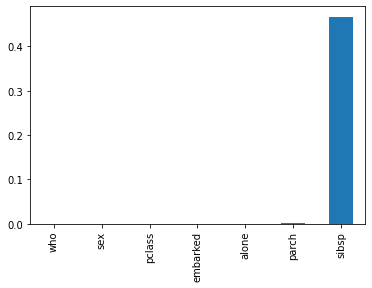

In [156]:
# Who and sex are the most important features
p_values.plot.bar()

In [157]:
X_train_2 = X_train[["who" , "sex"]]
X_test_2 = X_test[["who", "sex"]]
X_train_2.shape , X_test_2.shape

((711, 2), (178, 2))

In [0]:
def run_randomForest(X_train , X_test , y_train , y_test):
    clf = RandomForestClassifier(n_estimators= 100 , random_state=0, n_jobs = -1 )
    clf.fit(X_train , y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy on the test set:", accuracy_score(y_test, y_pred))

In [159]:
%%time
run_randomForest(X_train_2, X_test_2 , y_train , y_test)

Accuracy on the test set: 0.7191011235955056
CPU times: user 230 ms, sys: 43.5 ms, total: 273 ms
Wall time: 354 ms


In [160]:
X_train_3 = X_train[["who" , "sex" , "pclass"]]
X_test_3 = X_test[["who", "sex" , "pclass"]]
X_train_3.shape , X_test_3.shape

((711, 3), (178, 3))

In [161]:
%%time
run_randomForest(X_train_3, X_test_3 , y_train , y_test)

Accuracy on the test set: 0.7415730337078652
CPU times: user 235 ms, sys: 39.3 ms, total: 274 ms
Wall time: 349 ms


In [162]:
X_train_4a = X_train[["who" , "sex" , "pclass"  , "embarked"]]
X_test_4a = X_test[["who", "sex" , "pclass"  , "embarked"]]
X_train_4a.shape , X_test_4a.shape

((711, 4), (178, 4))

In [163]:
%%time
run_randomForest(X_train_4a, X_test_4a , y_train , y_test)

Accuracy on the test set: 0.7584269662921348
CPU times: user 224 ms, sys: 57.4 ms, total: 281 ms
Wall time: 350 ms


In [164]:
X_train_4b = X_train[["who" , "sex" , "pclass"  , "alone"]]
X_test_4b = X_test[["who", "sex" , "pclass"  , "alone"]]
X_train_4b.shape , X_test_4b.shape

((711, 4), (178, 4))

In [165]:
%%time
run_randomForest(X_train_4b, X_test_4b , y_train , y_test)

Accuracy on the test set: 0.7528089887640449
CPU times: user 236 ms, sys: 44.3 ms, total: 281 ms
Wall time: 348 ms


In [166]:
X_train_5 = X_train[["who" , "sex" , "pclass" , "embarked" , "alone" ]]
X_test_5 = X_test[["who", "sex" , "pclass" , "embarked" , "alone" ]]
X_train_5.shape , X_test_5.shape

((711, 5), (178, 5))

In [167]:
%%time
run_randomForest(X_train_5, X_test_5 , y_train , y_test)

Accuracy on the test set: 0.7528089887640449
CPU times: user 239 ms, sys: 42 ms, total: 281 ms
Wall time: 350 ms


In [168]:
%%time
run_randomForest(X_train, X_test , y_train , y_test)

Accuracy on the test set: 0.7359550561797753
CPU times: user 243 ms, sys: 43.5 ms, total: 286 ms
Wall time: 347 ms
